# Project 2
Vasanth Rajasekaran and Sam Childs

## Collaboration Plan
To facilitate collaboration, Sam and I have set up a private Github repository to share workbooks and data. We will ensure that each commit to the Git repo will include thorough comments documenting the changes. We also have frequent calls to check in on our progress and help eachother out if there are any blockers

In [37]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

sqlite_file = 'lahman2014.sqlite'
conn = sqlite3.connect(sqlite_file)

# Part 1 - Wrangling
## Problem 1

In [2]:
q = 'SELECT Teams.teamID, Teams.yearID, Teams.franchID, Teams.W, Teams.G, ((CAST(Teams.W as REAL)/Teams.G) * 100) as winning_percentage, sum(Salaries.salary) as total_payroll FROM Teams, Salaries WHERE Teams.teamID == Salaries.teamID AND Teams.yearID == Salaries.yearID GROUP BY Teams.yearID, Teams.teamID'
t = pandas.read_sql(q, conn)
t

,teamID,yearID,franchID,W,G,winning_percentage,total_payroll
0,ATL,1985,ATL,66,162,40.740741,14807000.0
1,BAL,1985,BAL,83,161,51.552795,11560712.0
2,BOS,1985,BOS,81,163,49.693252,10897560.0
3,CAL,1985,ANA,90,162,55.555556,14427894.0
4,CHA,1985,CHW,85,163,52.147239,9846178.0
...,...,...,...,...,...,...,...
853,SLN,2014,STL,90,162,55.555556,120693000.0
854,TBA,2014,TBD,77,162,47.530864,72689100.0
855,TEX,2014,TEX,67,162,41.358025,112255059.0
856,TOR,2014,TOR,83,162,51.234568,109920100.0


,teamID,yearID,franchID,W,G,winning_percentage,total_payroll
2,BOS,1985,BOS,81,163,49.693252,10897560.0
28,BOS,1986,BOS,95,161,59.006211,14402239.0
54,BOS,1987,BOS,78,162,48.148148,10144167.0
80,BOS,1988,BOS,89,162,54.938272,13896092.0
106,BOS,1989,BOS,83,162,51.234568,17481748.0
132,BOS,1990,BOS,88,162,54.320988,20558333.0
158,BOS,1991,BOS,84,162,51.851852,35167500.0
184,BOS,1992,BOS,73,162,45.061728,43610584.0
210,BOS,1993,BOS,80,162,49.382716,37120583.0
238,BOS,1994,BOS,54,115,46.956522,37859084.0


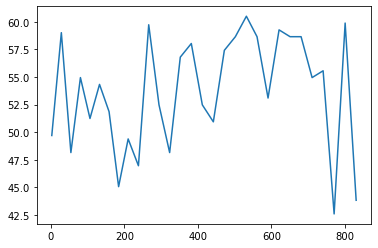

In [33]:
a = t[t.teamID == 'BOS']
a.winning_percentage.plot.line(x='yearID') # Is this plot meant to answer Part 2 Problem 2? it doesn't feel right
a

In this query we are getting six pieces of data from the db: Teams.teamID, Teams.yearID, Teams.franchID, Teams.W, Teams.G, and Salaries.salary from the Teams and Salaries tables. We then make sure we are calculating the correct payroll by matching the teamID and yearID between both tables. By matching, we are ensured we only populate the new table with teams that have salary data, which are teams after 1985. Thus no teams with missing salary or other data are included in our new table. 

# Part 2: Exploratory Data Analysis
## Problem 2

yearID  teamID
1985    ATL       AxesSubplot(0.125,0.125;0.775x0.755)
        BAL       AxesSubplot(0.125,0.125;0.775x0.755)
        BOS       AxesSubplot(0.125,0.125;0.775x0.755)
        CAL       AxesSubplot(0.125,0.125;0.775x0.755)
        CHA       AxesSubplot(0.125,0.125;0.775x0.755)
                                  ...                 
2014    SLN       AxesSubplot(0.125,0.125;0.775x0.755)
        TBA       AxesSubplot(0.125,0.125;0.775x0.755)
        TEX       AxesSubplot(0.125,0.125;0.775x0.755)
        TOR       AxesSubplot(0.125,0.125;0.775x0.755)
        WAS       AxesSubplot(0.125,0.125;0.775x0.755)
Name: total_payroll, Length: 858, dtype: object

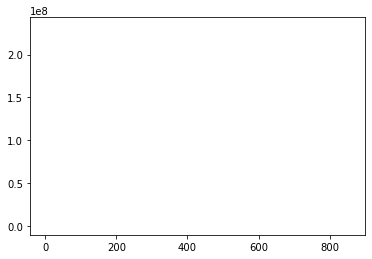

In [4]:
newPlot = t.groupby(['yearID', 'teamID']).total_payroll.plot.line()
newPlot

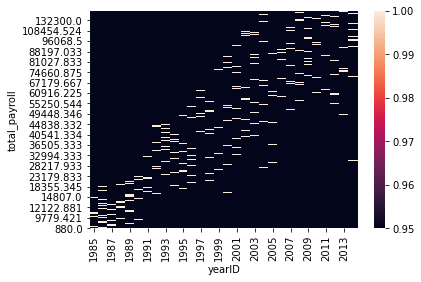

In [49]:
# Single plot of distributions:
# Maybe a heatmap would be good here...
data = pd.crosstab(t['total_payroll']/1000,t.yearID)
heat = sb.heatmap(data,vmin = 0.95) #If I can figure out how to make the crosstab use buckets, vmin\|/
heat.invert_yaxis()

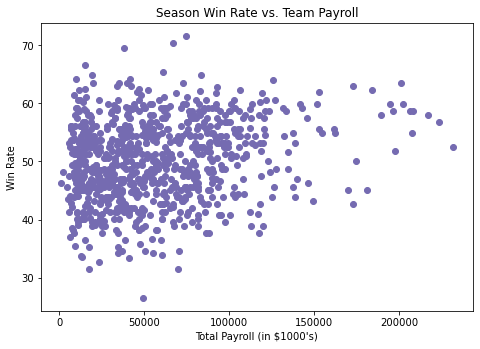

In [32]:
# Scatter Plot for Win percentage as a function of total payroll
x = t.total_payroll / 1000
y = t.winning_percentage

fig = plt.figure()
payWin = fig.add_axes([0,0,1,1])
payWin.scatter(x,y, color = "#756bb1")
payWin.set_xlabel('Total Payroll (in $1000\'s)')
payWin.set_ylabel('Win Rate')
payWin.set_title('Season Win Rate vs. Team Payroll')
plt.show()
